1: delta(n+4)
2: delta(n + 4)
1: delta(n-2)+u(n)
2: Piecewise((1, n >= 0), (0, True)) + delta(n - 2)
1: x(n)-x2(n)
2: x(n) - x2(n)
plotting


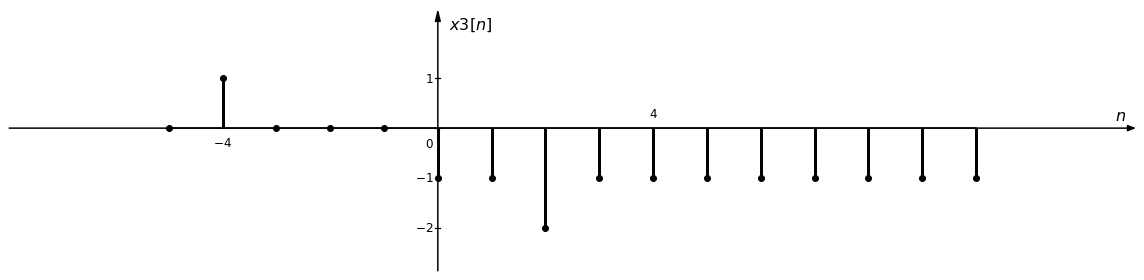

In [2]:
# Ejemplo 1 — Delta y escalón unitario

from signalblocks import DiscreteSignalPlotter

dsp = DiscreteSignalPlotter(figsize=[16, 4], xticks=[-4, 0, 4], horiz_range=(-5, 10), yticks='fit')

dsp.add_signal("x[n] = delta[n+4]")
dsp.add_signal("x2[n]=delta[n-2]+u[n]")
dsp.add_signal("x3[n]=x[n]-x2[n]")
dsp.plot("x3")


1: tri(n)
2: Piecewise((1 - Abs(n)/3, Abs(n) <= 3), (0, True))
1: Piecewise((1 - Abs(n)/3, Abs(n) <= 3), (0, True)) + Piecewise((1 - Abs(n - 40)/3, Abs(n - 40) <= 3), (0, True)) + Piecewise((1 - Abs(n - 30)/3, Abs(n - 30) <= 3), (0, True)) + Piecewise((1 - Abs(n - 20)/3, Abs(n - 20) <= 3), (0, True)) + Piecewise((1 - Abs(n - 10)/3, Abs(n - 10) <= 3), (0, True)) + Piecewise((1 - Abs(n + 10)/3, Abs(n + 10) <= 3), (0, True)) + Piecewise((1 - Abs(n + 20)/3, Abs(n + 20) <= 3), (0, True)) + Piecewise((1 - Abs(n + 30)/3, Abs(n + 30) <= 3), (0, True)) + Piecewise((1 - Abs(n + 40)/3, Abs(n + 40) <= 3), (0, True))
2: Piecewise((1 - Abs(n)/3, Abs(n) <= 3), (0, True)) + Piecewise((1 - Abs(n - 40)/3, Abs(n - 40) <= 3), (0, True)) + Piecewise((1 - Abs(n - 30)/3, Abs(n - 30) <= 3), (0, True)) + Piecewise((1 - Abs(n - 20)/3, Abs(n - 20) <= 3), (0, True)) + Piecewise((1 - Abs(n - 10)/3, Abs(n - 10) <= 3), (0, True)) + Piecewise((1 - Abs(n + 10)/3, Abs(n + 10) <= 3), (0, True)) + Piecewise((1 - Abs(n + 

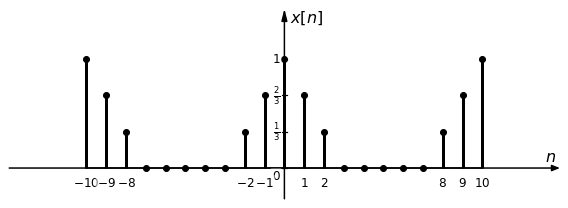

In [1]:
# Ejemplo 2 — Triángulo y desplazamiento temporal

from signalblocks import DiscreteSignalPlotter

dsp = DiscreteSignalPlotter(horiz_range=(-10, 10), yticks='fit', fraction_ticks=True)

# Definimos señal triangular desplazada
dsp.add_signal("x[n] = tri(n)", period=10)

dsp.plot("x")

1: rect(n)
2: Piecewise((1, Abs(n) <= 1), (0, True))
1: delta(n-2)
2: delta(n - 2)
1: 2 * x1(n-1) + 0.5 * x2(n+1)
2: 2*x1(n - 1) + 0.5*x2(n + 1)
plotting


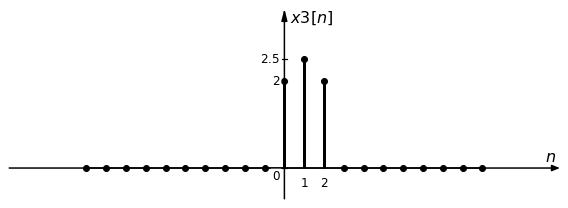

In [3]:
# Ejemplo 3 — Combinación de señales

dsp = DiscreteSignalPlotter(horiz_range=(-10, 10), yticks='fit')

dsp.add_signal("x1[n] = rect(n)")
dsp.add_signal("x2[n] = delta(n-2)")
dsp.add_signal("x3[n] = 2 * x1[n-1] + 0.5 * x2[n+1]")

dsp.plot("x3")

1: delta(n) + delta(n-5) + delta(n-10)
2: delta(n) + delta(n - 10) + delta(n - 5)
plotting


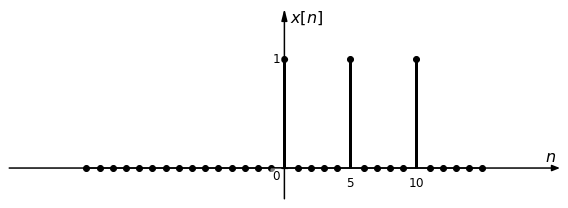

1: delta(n)
2: delta(n)
1: delta(n) + delta(n - 40) + delta(n - 35) + delta(n - 30) + delta(n - 25) + delta(n - 20) + delta(n - 15) + delta(n - 10) + delta(n - 5) + delta(n + 5) + delta(n + 10) + delta(n + 15) + delta(n + 20) + delta(n + 25) + delta(n + 30) + delta(n + 35) + delta(n + 40)
2: delta(n) + delta(n - 40) + delta(n - 35) + delta(n - 30) + delta(n - 25) + delta(n - 20) + delta(n - 15) + delta(n - 10) + delta(n - 5) + delta(n + 5) + delta(n + 10) + delta(n + 15) + delta(n + 20) + delta(n + 25) + delta(n + 30) + delta(n + 35) + delta(n + 40)
plotting


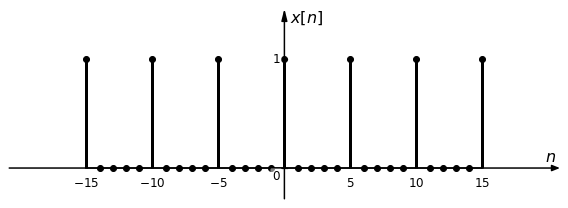

In [6]:
 # Ejemplo 4 — Señal periódica discreta (próxima extensión)

dsp = DiscreteSignalPlotter(horiz_range=(-15, 15), yticks='fit')

# Simular periodicidad manualmente por ahora
dsp.add_signal("x[n] = delta(n) + delta(n-5) + delta(n-10)")
dsp.plot("x")


dsp.add_signal("x[n] = delta(n)", period=5)
dsp.plot("x")


1: (0.8)**n * u(n)
2: 0.8**n*Piecewise((1, n >= 0), (0, True))
plotting


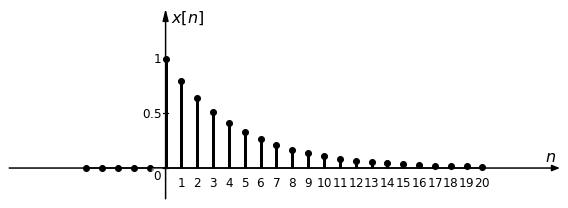

In [10]:
# Ejemplo 5 — Señal exponencial

dsp = DiscreteSignalPlotter(horiz_range=(-5, 20))

# Señal causal exponencial decreciente
dsp.add_signal("x[n] = (0.8)**n * u(n)")
dsp.plot("x")

1: sin(0.7853981633974483*n)
2: sin(0.7853981633974483*n)
plotting


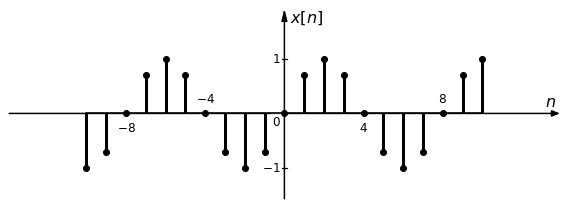

In [1]:
# Ejemplo 6 — Señal seno discreta (frecuencia normalizada)

import numpy as np
from signalblocks import DiscreteSignalPlotter

dsp = DiscreteSignalPlotter(horiz_range=(-10, 10), xticks_delta=4)

# Señal sinusoidal discreta
w0 = np.pi / 4
dsp.add_signal(f"x[n] = sin({w0}*n)")
dsp.plot("x")

1: delta(n-3)
2: delta(n - 3)
plotting


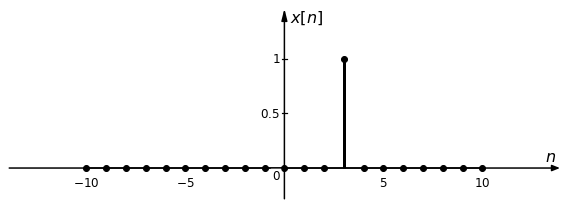

In [1]:
# Ejemplo 6 — Señal seno discreta (frecuencia normalizada)

import numpy as np
from signalblocks import DiscreteSignalPlotter

dsp = DiscreteSignalPlotter(horiz_range=(-10, 10), xticks_delta=5)

# Señal sinusoidal discreta
w0 = np.pi / 4
dsp.add_signal(f"x[n] = delta[n-3]")
dsp.plot("x")

1: delta(n) + delta(n-2) + u(n-3)
2: Piecewise((1, n >= 3), (0, True)) + delta(n) + delta(n - 2)
plotting


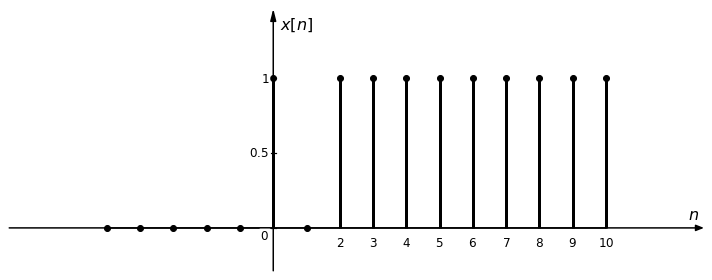

1: tri(n-2) + 0.5*tri(-n+3)
2: 0.5*Piecewise((1 - Abs(n - 3)/3, Abs(n - 3) <= 3), (0, True)) + Piecewise((1 - Abs(n - 2)/3, Abs(n - 2) <= 3), (0, True))
plotting


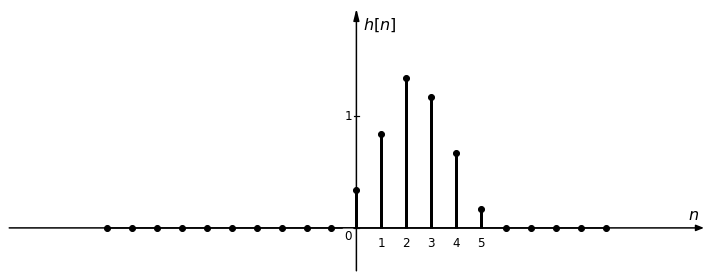

1: cos(pi*n/4) * (delta(n) + delta(n-8) + delta(n+8))
2: (delta(n) + delta(n - 8) + delta(n + 8))*cos(pi*n/4)
plotting


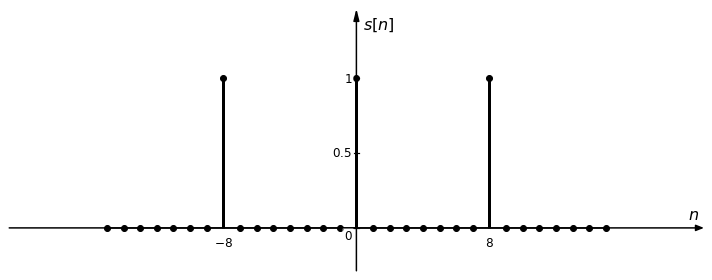

1: sinc(n) + u(n-3)
2: Piecewise((1, n >= 3), (0, True)) + sinc(n)
plotting


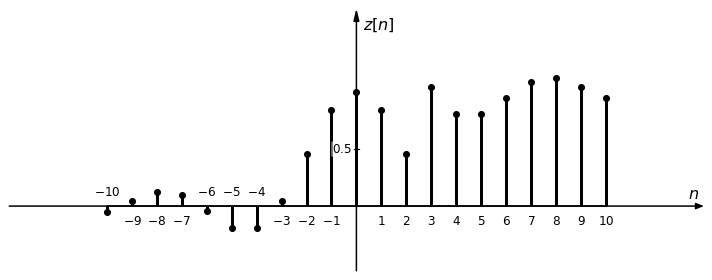

1: s(n) + z(n-3)
2: n*s + z(n - 3)


In [16]:
# DiscreteSignalPlotter demonstration

from signalblocks import DiscreteSignalPlotter
import numpy as np

# Example 1: Simple impulses and step
dsp = DiscreteSignalPlotter(horiz_range=(-5, 10), figsize=(10, 4))

# Define: x[n] = delta(n) + delta(n-2) + u(n-3)
dsp.add_signal("x[n] = delta[n] + delta[n-2] + u[n-3]")
dsp.plot("x")

# Example 2: Delayed and flipped signal
dsp = DiscreteSignalPlotter(horiz_range=(-10, 10), figsize=(10, 4))

# Define: h[n] = tri(n-2) + 0.5*tri(-n+3)
dsp.add_signal("h[n] = tri(n-2) + 0.5*tri(-n+3)", label="h[n]")
dsp.plot("h")

# Example 3: Sinusoidal + impulse train
dsp = DiscreteSignalPlotter(horiz_range=(-15, 15), figsize=(10, 4))

# Define periodic impulse train + cosine
dsp.add_signal("s[n] = cos(pi*n/4) * (delta(n) + delta(n-8) + delta(n+8))")
dsp.plot("s")

# Example 4: Combination of unit step and sinc
dsp = DiscreteSignalPlotter(horiz_range=(-10, 10), figsize=(10, 4))

dsp.add_signal("z[n] = sinc(n) + u(n-3)", label="z[n]")
dsp.plot("z")

dsp.add_signal("x2[n] = s[n] + z[n-3]", label="x2[n]") 
